# To perform multi-classifier SVM for pure signals for 8 targets


# Organzing and loading the data for all related days 

In [70]:
# clean the memory 


# loading the library
import numpy as np
import os
import os.path
import scipy.io
from scipy.io import loadmat
import pickle
import hdf5storage as hdf5s
import h5py

# Experiment info 
# loading the imagined data

# initilize the values
class structtype():
    pass

ExptDays = list(['20201113'])
NumDay = len(ExptDays);
SessionDay = [ structtype() for i in range(NumDay)]
SessionDay[0].hhmmss = list(['112049','113417'])

# for reading mat file from matlab
# it is easier to use class for further extracting necessary params or data
class MatFileAnalyzer():
    
    # first mandatory method; constructor
    def __init__(self,Mat_data):
        self.Fs = Mat_data['TrialData']['Params']['Fs'][0]
        self.UpdateRate = Mat_data['TrialData']['Params']['UpdateRate'][0]
        self.TargetID = Mat_data['TrialData']['TargetID'][0]
        
    def ECoG_Raw(self):
        
        Signals = Mat_data['TrialData']['BroadbandData']
        BinNum, b = Signals.shape
        ECoGData = np.empty((0,128), dtype=float)
        for i in range(BinNum):
            Bin = Mat_data['TrialData']['BroadbandData'][i][0]
            BinName = h5py.h5r.get_name(Bin, Mat_data.id)
            BinInfo = Mat_data[BinName] 
            BinData = BinInfo[:,:]
            ECoGData = np.concatenate((ECoGData, BinData.T), axis=0)

        return ECoGData


# finding single trials

ID1 = 0;
ID2 = 0;
ID3 = 0;
ID4 = 0;
ID5 = 0;
ID6 = 0;
ID7 = 0;
ID8 = 0;


Trials_T1 = np.empty((0,128), dtype=float)
Trials_T2 = np.empty((0,128), dtype=float)
Trials_T3 = np.empty((0,128), dtype=float)
Trials_T4 = np.empty((0,128), dtype=float)
Trials_T5 = np.empty((0,128), dtype=float)
Trials_T6 = np.empty((0,128), dtype=float)
Trials_T7 = np.empty((0,128), dtype=float)
Trials_T8 = np.empty((0,128), dtype=float)

# loading the day/block/session data from the location
for Day in [0]:#[0, 1, 2]
    for Se in range (len(SessionDay[Day].hhmmss)):

        print('Session:'+ SessionDay[Day].hhmmss[Se])
        # in windows
        DataPath =os.path.join('E:','\BRAVO1','CursorPlatform','Data',ExptDays[Day],'GangulyServer',ExptDays[Day],'CenterOut',SessionDay[Day].hhmmss[Se],'Imagined')
        datadir = os.listdir(DataPath)

        # loading the trials
        for k in range(len(datadir)):

            print('Trial:',k+1)
            Mat_data = h5py.File(DataPath+'/'+datadir[k])
            TrialData = MatFileAnalyzer(Mat_data)
            ECoG1 = TrialData.ECoG_Raw()
            Fs = TrialData.Fs
            # consider last 2 second for analysis
            ECoG2 = ECoG1[len(ECoG1)-2000:len(ECoG1),:]

            if TrialData.TargetID == 1:
                ID1 = ID1+1                   
                Trials_T1 = np.append(Trials_T1, ECoG2, axis=0)

            elif TrialData.TargetID == 2:
                ID2 = ID2+1
                Trials_T2 = np.append(Trials_T2, ECoG2, axis=0)

            elif TrialData.TargetID == 3:
                ID3 = ID3+1
                Trials_T3 = np.append(Trials_T3, ECoG2, axis=0)

            elif TrialData.TargetID == 4:
                ID4 = ID4+1
                Trials_T4 = np.append(Trials_T4, ECoG2, axis=0)
            
            elif TrialData.TargetID == 5:
                ID5 = ID5+1
                Trials_T5 = np.append(Trials_T5, ECoG2, axis=0)
            
            elif TrialData.TargetID == 6:
                ID6 = ID6+1
                Trials_T6 = np.append(Trials_T6, ECoG2, axis=0)
            
            elif TrialData.TargetID == 7:
                ID7 = ID7+1
                Trials_T7 = np.append(Trials_T7, ECoG2, axis=0)
            
            elif TrialData.TargetID == 8:
                ID8 = ID8+1
                Trials_T8 = np.append(Trials_T8, ECoG2, axis=0)
                       
                        
print('End of Running Section')  


            

Session:112049
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Trial: 33
Trial: 34
Trial: 35
Trial: 36
Trial: 37
Trial: 38
Trial: 39
Trial: 40
Trial: 41
Trial: 42
Session:113417
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Trial: 5
Trial: 6
Trial: 7
Trial: 8
Trial: 9
Trial: 10
Trial: 11
Trial: 12
Trial: 13
Trial: 14
Trial: 15
Trial: 16
Trial: 17
Trial: 18
Trial: 19
Trial: 20
Trial: 21
Trial: 22
Trial: 23
Trial: 24
Trial: 25
Trial: 26
Trial: 27
Trial: 28
Trial: 29
Trial: 30
Trial: 31
Trial: 32
Trial: 33
Trial: 34
Trial: 35
Trial: 36
Trial: 37
Trial: 38
Trial: 39
Trial: 40
Trial: 41
Trial: 42
Trial: 43
Trial: 44
Trial: 45
Trial: 46
Trial: 47
Trial: 48
Trial: 49
Trial: 50
Trial: 51
Trial: 52
Trial: 53
Trial: 54
Trial: 55
Trial: 56
Trial: 5

In [77]:
Trials_T8.shape

(20000, 128)

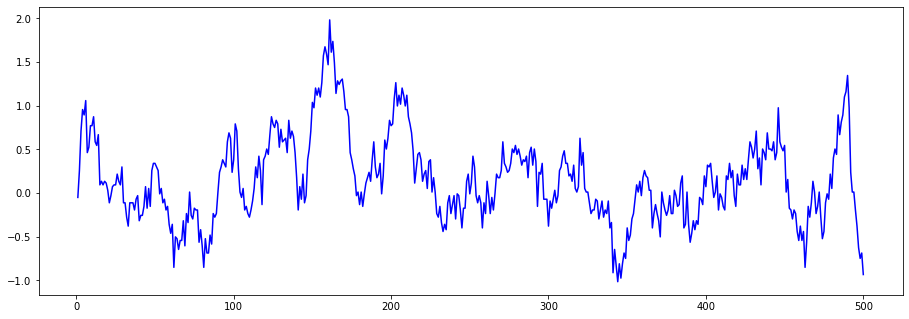

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Trials_T4[0:500,0],'b')

# Filtering the signals

In [79]:
from scipy.signal import butter, filtfilt, hilbert
import matplotlib.pyplot as plt


All_Signal = [Trials_T1, Trials_T2, Trials_T3, Trials_T4, Trials_T5, Trials_T6, Trials_T7, Trials_T8];

# initilize the values
class structtype():
    pass

HilbertTarget = [ structtype() for i in range(8)]
HilbertTarget[0].feature = [ structtype() for i in range(6)]
HilbertTarget[1].feature = [ structtype() for i in range(6)]
HilbertTarget[2].feature = [ structtype() for i in range(6)]
HilbertTarget[3].feature = [ structtype() for i in range(6)]
HilbertTarget[4].feature = [ structtype() for i in range(6)]
HilbertTarget[5].feature = [ structtype() for i in range(6)]
HilbertTarget[6].feature = [ structtype() for i in range(6)]
HilbertTarget[7].feature = [ structtype() for i in range(6)]

for target in range(8):
    print('Target:',target)
    Raw_Signals = All_Signal[target]
    
    # for delta band
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[0] = Hil
    
    # for theta band
    nyq = 0.5 * Fs
    low = 4/nyq
    high = 8/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[1] = Hil
    
    # for alpha band
    nyq = 0.5 * Fs
    low = 8/nyq
    high = 13/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[2] = Hil
    
    # for beta band
    nyq = 0.5 * Fs
    low = 13/nyq
    high = 30/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[3] = Hil
    
    # for gamma1 band
    nyq = 0.5 * Fs
    low = 30/nyq
    high = 50/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil = np.abs(hilbert(Filtered,axis=0))
    HilbertTarget[target].feature[4] = Hil
    
    # for hg-lfo band
    nyq = 0.5 * Fs
    low = 70/nyq
    high = 150/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered = filtfilt(b,a,Raw_Signals,axis=0)
    Hil1 = np.abs(hilbert(Filtered,axis=0))
    nyq = 0.5 * Fs
    low = 0.5/nyq
    high = 4/nyq
    b, a = butter(3, [low, high], btype='band')
    Filtered2 = filtfilt(b,a,Hil1,axis=0)
    Hil2 = Filtered2 + Hil1.mean(0)
    HilbertTarget[target].feature[5] = Hil2
    
print('End of Running Section')   

Target: 0
Target: 1
Target: 2
Target: 3
Target: 4
Target: 5
Target: 6
Target: 7
End of Running Section


(20000, 128)

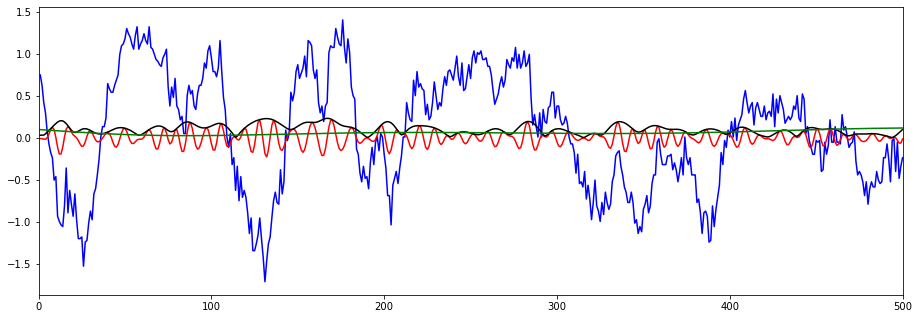

In [80]:
# test the signal
#a, b = Raw_Signals.shape
#t = np.arange(1,a+1,1)
t = np.arange(1,500+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Raw_Signals[0:500,0],'b')
ax.plot(t,Filtered[0:500,0],'r')
ax.plot(t,Hil1[0:500,0],'k')
Forplot = HilbertTarget[3].feature[5]
ax.plot(t,Forplot[0:500,0],'g')
ax.set_xlim([0,500])
#ax.set_ylim([0,2])
Raw_Signals.shape

# Factor Analysis for concatanated single-trials per targets (will have 4FA)

In [81]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import pandas as pd

    
# initilize the values
class structtype():
    pass
# for FA signals
FASignalTarget = [ structtype() for i in range(8)]
FASignalTarget[0].feature = [ structtype() for i in range(6)]
FASignalTarget[1].feature = [ structtype() for i in range(6)]
FASignalTarget[2].feature = [ structtype() for i in range(6)]
FASignalTarget[3].feature = [ structtype() for i in range(6)]
FASignalTarget[4].feature = [ structtype() for i in range(6)]
FASignalTarget[5].feature = [ structtype() for i in range(6)]
FASignalTarget[6].feature = [ structtype() for i in range(6)]
FASignalTarget[7].feature = [ structtype() for i in range(6)]


# for FA weights
FAWeightTarget = [ structtype() for i in range(8)]
FAWeightTarget[0].feature = [ structtype() for i in range(6)]
FAWeightTarget[1].feature = [ structtype() for i in range(6)]
FAWeightTarget[2].feature = [ structtype() for i in range(6)]
FAWeightTarget[3].feature = [ structtype() for i in range(6)]
FAWeightTarget[4].feature = [ structtype() for i in range(6)]
FAWeightTarget[5].feature = [ structtype() for i in range(6)]
FAWeightTarget[6].feature = [ structtype() for i in range(6)]
FAWeightTarget[7].feature = [ structtype() for i in range(6)]

for target in range(8):
    print('Target:',target)
    
    for Fe in range(6): 
        #transformer = FactorAnalysis(n_components=10, random_state=0)
        #FASignalTarget[target].feature[Fe] = transformer.fit_transform(HilbertTarget[target].feature[Fe])
        
        fa = FactorAnalyzer(10,rotation=None)
        fa.fit(HilbertTarget[target].feature[Fe])
        FAWeightTarget[target].feature[Fe] = fa.loadings_
        FASignalTarget[target].feature[Fe] = (HilbertTarget[target].feature[Fe]) @ (FAWeightTarget[target].feature[Fe])
        
        


Target: 0
Target: 1
Target: 2
Target: 3
Target: 4
Target: 5
Target: 6
Target: 7


In [82]:
Activation_Signal = FASignalTarget[7].feature[5]
Activation_Signal.shape


(20000, 10)

(20000, 10)

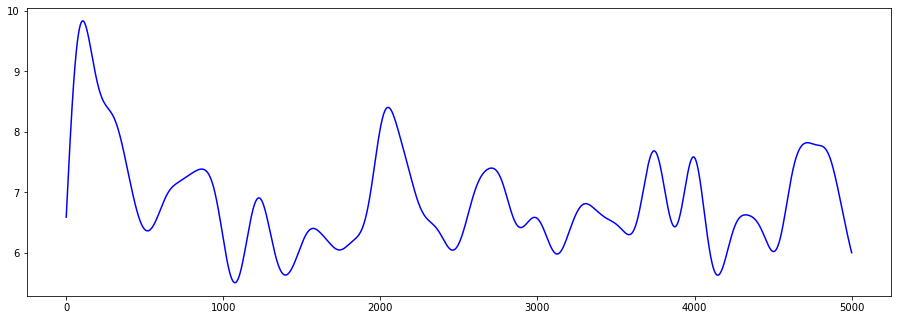

In [83]:
# test the factors
%matplotlib inline
Activation_Signal =(FASignalTarget[7].feature[5])
t = np.arange(1,5000+1,1)
fig = plt.figure(figsize=(12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(t,Activation_Signal[0:5000,0],'b')
#ax.set_xlim([0,1])
#ax.set_ylim([0,2])

Activation_Signal.shape

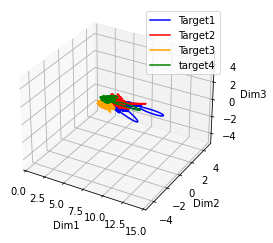

In [84]:
# 3D plot for the first 3 FA signals; choose the options 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib qt
#%matplotlib notebook

#choose this option
Fe = 5;
ax = plt.axes(projection='3d')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
ax.set_xlim([0,15])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])

ListMarker = ['blue','red','orange','green']
ListLegend = ['Target1','Target2','Target3','target4']

for target in range(4):
    
    # Data for a three-dimensional line
    Activation_Signal = FASignalTarget[target].feature[Fe]
    xline = Activation_Signal[:,0]
    yline = Activation_Signal[:,1]
    zline = Activation_Signal[:,2]
    ax.plot3D(xline, yline, zline,color=ListMarker[target], label=ListLegend[target])
    
plt.show()
ax.legend(loc=0)




# Cross projection of FA for later test in SVM

In [341]:
# choose the feature you want to project the signals through that
Fe = 5;

# initilize the values
class structtype():
    pass
# for FA signals
FASignalProj = [ structtype() for i in range(4)]
FASignalProj[0].ProjectedTarget = [ structtype() for i in range(4)]
FASignalProj[1].ProjectedTarget = [ structtype() for i in range(4)]
FASignalProj[2].ProjectedTarget = [ structtype() for i in range(4)]
FASignalProj[3].ProjectedTarget = [ structtype() for i in range(4)]

for Target_Mirror in range(4):
    for Target in range(4):
        FASignalProj[Target_Mirror].ProjectedTarget[Target] = (HilbertTarget[Target].feature[Fe]) @ (FAWeightTarget[Target_Mirror].feature[Fe]) 
        


# Performing binary-classifier SVM for pure features or FA signals

In [412]:
q = FASignalTarget[0].feature[5]

In [413]:
q.shape

(16000, 10)

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [506]:
# without FA
X_T1 = HilbertTarget[0].feature[5]
X_T2 = HilbertTarget[1].feature[5]

# with FA
#X_T1 = FASignalTarget[0].feature[5]
#X_T2 = FASignalTarget[1].feature[5]

# balance the data
Indx = min(X_T1.shape[0], X_T2.shape[0])
step = 1
KeepSample = 5000 

X_heldout_T1 = X_T1[(Indx-KeepSample):Indx:step,:]
X_heldout_T2 = X_T2[(Indx-KeepSample):Indx:step,:]

y_heldout_T1 = np.zeros((X_heldout_T1.shape[0],1))
y_heldout_T2 = np.ones((X_heldout_T2.shape[0],1))

X_heldout = np.append(X_heldout_T1, X_heldout_T2, axis=0) 
y_heldout = np.append(y_heldout_T1, y_heldout_T2, axis=0)
# flatten the array
y_heldout =y_heldout.ravel()

X_T1 = X_T1[0:(Indx-KeepSample):step,:]
X_T2 = X_T2[0:(Indx-KeepSample):step,:]

y_T1 = np.zeros((X_T1.shape[0],1))
y_T2 = np.ones((X_T2.shape[0],1))

X = np.append(X_T1, X_T2, axis=0) 
y = np.append(y_T1, y_T2, axis=0)
# flatten the array
y =y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [507]:
X_T1.shape

(73880, 128)

In [508]:
from sklearn.svm import SVC
model_binary = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
model_binary.fit(X_train,y_train)


SVC()

In [509]:
y.shape

(147760,)

In [510]:
predictions_binary = model_binary.predict(X_test)

In [511]:
from sklearn.metrics import classification_report, confusion_matrix

In [512]:
print(confusion_matrix(y_test, predictions_binary))
print('\n')
print(classification_report(y_test,predictions_binary))

[[24320     0]
 [    0 24441]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24320
         1.0       1.00      1.00      1.00     24441

    accuracy                           1.00     48761
   macro avg       1.00      1.00      1.00     48761
weighted avg       1.00      1.00      1.00     48761



In [513]:
# get support vectors
NumSV = model_binary.support_vectors_
NumSV.shape

(2065, 128)

In [514]:
# get indices of support vectors
model_binary.support_

array([   29,   169,   217, ..., 98769, 98779, 98881])

In [515]:
# get number of support vectors for each class
model_binary.n_support_

array([ 961, 1104])

In [517]:
# testing the held_out data
predictions_heldout_binary = model_binary.predict(X_heldout)
print(confusion_matrix(y_heldout, predictions_heldout_binary))
print('\n')
print(classification_report(y_heldout, predictions_heldout_binary))


[[4817  183]
 [ 122 4878]]


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      5000
         1.0       0.96      0.98      0.97      5000

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Parameter adjustment for binary-classifier SVM

In [364]:
from sklearn.model_selection import GridSearchCV

In [365]:
param_grid_binary = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

In [366]:
grid_binary = GridSearchCV(SVC(),param_grid_binary, verbose=3)

In [367]:
grid_binary.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.993, total=   2.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.994, total=   2.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.991, total=   2.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.993, total=   2.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.992, total=   2.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.987, total=   4.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.988, total=   4.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.984, total=   4.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.987, total=   4.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.989, total=   1.8s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.990, total=   1.8s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.987, total=   1.9s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.990, total=   1.8s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.989, total=   1.8s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.988, total=   4.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.988, total=   4.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.993, total=   0.8s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.991, total=   0.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.989, total=   1.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.990, total=   1.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.987, total=   1.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.990, total=   1.8s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.989, total=   1.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  9.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [368]:
grid_binary.best_params_

{'C': 10, 'gamma': 1}

In [369]:
grid_binary.best_estimator_

SVC(C=10, gamma=1)

In [371]:
# result on training set
predictions_grid_binary = grid_binary.predict(X_test)

In [372]:
print(confusion_matrix(y_test, predictions_grid_binary))
print('\n')
print(classification_report(y_test,predictions_grid_binary))

[[6643    0]
 [   0 6684]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6643
         1.0       1.00      1.00      1.00      6684

    accuracy                           1.00     13327
   macro avg       1.00      1.00      1.00     13327
weighted avg       1.00      1.00      1.00     13327



In [374]:
# result on held_out data
predictions_heldout_binary = grid_binary.predict(X_heldout)
print(confusion_matrix(y_heldout, predictions_heldout_binary))
print('\n')
print(classification_report(y_heldout, predictions_heldout_binary))


[[4984   16]
 [   0 5000]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5000
         1.0       1.00      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# Performing multi-classifier SVM for pure features or FA signals


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# without FA
"""
X_T1 = HilbertTarget[0].feature[5]
X_T2 = HilbertTarget[1].feature[5]
X_T3 = HilbertTarget[2].feature[5]
X_T4 = HilbertTarget[3].feature[5]
X_T5 = HilbertTarget[4].feature[5]
X_T6 = HilbertTarget[5].feature[5]
X_T7 = HilbertTarget[6].feature[5]
X_T8 = HilbertTarget[7].feature[5]
"""

# with FA
X_T1 = FASignalTarget[0].feature[5]
X_T2 = FASignalTarget[1].feature[5]
X_T3 = FASignalTarget[2].feature[5]
X_T4 = FASignalTarget[3].feature[5]
X_T5 = FASignalTarget[4].feature[5]
X_T6 = FASignalTarget[5].feature[5]
X_T7 = FASignalTarget[6].feature[5]
X_T8 = FASignalTarget[7].feature[5]


# balance the data
Indx = min(X_T1.shape[0], X_T2.shape[0],X_T3.shape[0],X_T4.shape[0], X_T5.shape[0], X_T6.shape[0],X_T7.shape[0],X_T8.shape[0])
step = 1
KeepSample = 3000 

X_heldout_T1 = X_T1[(Indx-KeepSample):Indx:step,:]
X_heldout_T2 = X_T2[(Indx-KeepSample):Indx:step,:]
X_heldout_T3 = X_T3[(Indx-KeepSample):Indx:step,:]
X_heldout_T4 = X_T4[(Indx-KeepSample):Indx:step,:]
X_heldout_T5 = X_T5[(Indx-KeepSample):Indx:step,:]
X_heldout_T6 = X_T6[(Indx-KeepSample):Indx:step,:]
X_heldout_T7 = X_T7[(Indx-KeepSample):Indx:step,:]
X_heldout_T8 = X_T8[(Indx-KeepSample):Indx:step,:]

y_heldout_T1 = np.zeros((X_heldout_T1.shape[0],1))
y_heldout_T2 = np.ones((X_heldout_T2.shape[0],1))
y_heldout_T3 = 2*np.ones((X_heldout_T3.shape[0],1))
y_heldout_T4 = 3*np.ones((X_heldout_T4.shape[0],1))
y_heldout_T5 = 4*np.zeros((X_heldout_T5.shape[0],1))
y_heldout_T6 = 5*np.ones((X_heldout_T6.shape[0],1))
y_heldout_T7 = 6*np.ones((X_heldout_T7.shape[0],1))
y_heldout_T8 = 7*np.ones((X_heldout_T8.shape[0],1))

X_heldout = np.concatenate((X_heldout_T1, X_heldout_T2, X_heldout_T3, X_heldout_T4,X_heldout_T5, X_heldout_T6, X_heldout_T7, X_heldout_T8), axis=0) 
y_heldout = np.concatenate((y_heldout_T1, y_heldout_T2, y_heldout_T3, y_heldout_T4, y_heldout_T7, y_heldout_T6, y_heldout_T7, y_heldout_T8), axis=0)
# flatten the array
y_heldout =y_heldout.ravel()

X_T1 = X_T1[0:(Indx-KeepSample):step,:]
X_T2 = X_T2[0:(Indx-KeepSample):step,:]
X_T3 = X_T3[0:(Indx-KeepSample):step,:]
X_T4 = X_T4[0:(Indx-KeepSample):step,:]
X_T5 = X_T5[0:(Indx-KeepSample):step,:]
X_T6 = X_T6[0:(Indx-KeepSample):step,:]
X_T7 = X_T7[0:(Indx-KeepSample):step,:]
X_T8 = X_T8[0:(Indx-KeepSample):step,:]

y_T1 = np.zeros((X_T1.shape[0],1))
y_T2 = np.ones((X_T2.shape[0],1))
y_T3 = 2*np.ones((X_T3.shape[0],1))
y_T4 = 3*np.ones((X_T4.shape[0],1))
y_T5 = 4*np.zeros((X_T5.shape[0],1))
y_T6 = 5*np.ones((X_T6.shape[0],1))
y_T7 = 6*np.ones((X_T7.shape[0],1))
y_T8 = 7*np.ones((X_T8.shape[0],1))

X = np.concatenate((X_T1, X_T2, X_T3, X_T4,X_T5, X_T6, X_T7, X_T8), axis=0) 
y = np.concatenate((y_T1, y_T2, y_T3, y_T4,y_T5, y_T6, y_T7, y_T8), axis=0)
# flatten the array
y =y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
X_train.shape

(91120, 10)

In [95]:
from sklearn.svm import SVC
model_multi = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
model_multi.fit(X_train,y_train)
SVC()

SVC()

In [96]:
# get support vectors
NumSV = model_multi.support_vectors_
NumSV.shape

(11690, 10)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

# testing the trainig result
predictions_multi = model_multi.predict(X_test)
print(confusion_matrix(y_test, predictions_multi))
print('\n')
print(classification_report(y_test, predictions_multi))


[[11188     0     5    20     0     0     0]
 [    0  5629     0     0     0     0     0]
 [    0     0  5692     9     0     0     0]
 [   46     0     0  5486     0     0     0]
 [    0     0    43     0  5501     0    17]
 [   73     0     0     0     0  5535     0]
 [    0     0     0     0     0     0  5636]]


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11213
         1.0       1.00      1.00      1.00      5629
         2.0       0.99      1.00      1.00      5701
         3.0       0.99      0.99      0.99      5532
         5.0       1.00      0.99      0.99      5561
         6.0       1.00      0.99      0.99      5608
         7.0       1.00      1.00      1.00      5636

    accuracy                           1.00     44880
   macro avg       1.00      0.99      1.00     44880
weighted avg       1.00      1.00      1.00     44880



In [98]:
# testing the held_out data
predictions_heldout_multi = model_multi.predict(X_heldout)
print(confusion_matrix(y_heldout, predictions_heldout_multi))
print('\n')
print(classification_report(y_heldout, predictions_heldout_multi))

[[2870    0    0    0  130    0    0]
 [   0 3000    0    0    0    0    0]
 [   0    0 3000    0    0    0    0]
 [   0    0    0 3000    0    0    0]
 [  56    0    0    0 2944    0    0]
 [3046    0    0   60    0 2894    0]
 [   0    0    0    0    0    0 3000]]


              precision    recall  f1-score   support

         0.0       0.48      0.96      0.64      3000
         1.0       1.00      1.00      1.00      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.98      1.00      0.99      3000
         5.0       0.96      0.98      0.97      3000
         6.0       1.00      0.48      0.65      6000
         7.0       1.00      1.00      1.00      3000

    accuracy                           0.86     24000
   macro avg       0.92      0.92      0.89     24000
weighted avg       0.93      0.86      0.86     24000



# Parameter adjustment for multi-classifier SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
grid_multi = GridSearchCV(SVC(),param_grid, verbose=3)
grid_multi.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.855, total=47.1min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 47.1min remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.857, total=46.9min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 94.1min remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.858, total=46.8min
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.857, total=46.5min
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.858, total=46.6min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.792, total=81.5min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.788, total=86.1min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.791, total=76.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.791, total=80.7min
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

In [433]:
grid_multi.best_params_

{'C': 1, 'gamma': 1}

In [434]:
predictions_grid_multi = grid_multi.predict(X_test)

In [435]:
print(confusion_matrix(y_test, predictions_grid_multi))
print('\n')
print(classification_report(y_test,predictions_grid_multi))

[[2093    0    0    0]
 [   0 2130    0    0]
 [   0    0 2088    0]
 [   0    0    0 2137]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2093
         1.0       1.00      1.00      1.00      2130
         2.0       1.00      1.00      1.00      2088
         3.0       1.00      1.00      1.00      2137

    accuracy                           1.00      8448
   macro avg       1.00      1.00      1.00      8448
weighted avg       1.00      1.00      1.00      8448



In [436]:
# testing the held_out data
predictions_heldout_multi = grid_multi.predict(X_heldout)
print(confusion_matrix(y_heldout, predictions_heldout_multi))
print('\n')
print(classification_report(y_heldout, predictions_heldout_multi))

[[4961    0    0   39]
 [   0 5000    0    0]
 [   0    0 5000    0]
 [  41    0   86 4873]]


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5000
         1.0       1.00      1.00      1.00      5000
         2.0       0.98      1.00      0.99      5000
         3.0       0.99      0.97      0.98      5000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



In [2]:
[True, True] & [True, True]

TypeError: unsupported operand type(s) for &: 'list' and 'list'